Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [31]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
file_path = 'work/machine learning /ML part 2/flight_price.xlsx'

# Load the dataset into a pandas DataFrame
flight_data = pd.read_excel('flight_price.xlsx')

# Display the dimensions of the dataset
print("Number of rows:", flight_data.shape[0])
print("Number of columns:", flight_data.shape[1])


Number of rows: 10683
Number of columns: 11


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [32]:
df = flight_data
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.Price

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

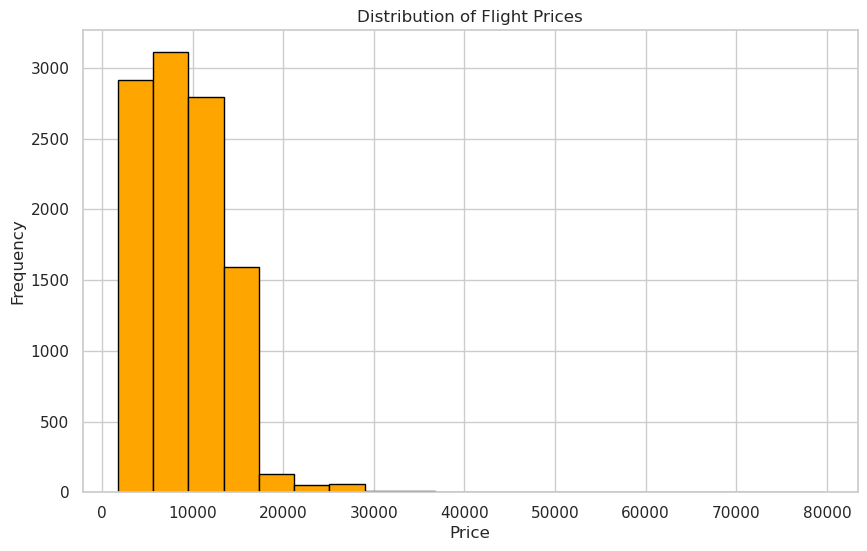

In [9]:
import matplotlib.pyplot as plt

# Assuming 'price' is the column containing flight prices
prices = flight_data['Price']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [6]:
prices = flight_data['Price']

# Calculate the range, minimum, and maximum prices
price_range = prices.max() - prices.min()
min_price = prices.min()
max_price = prices.max()

# Print the results
print("Price Range: {}".format(price_range))
print("Minimum Price: {}".format(min_price))
print("Maximum Price: {}".format(max_price))

Price Range: 77753
Minimum Price: 1759
Maximum Price: 79512


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

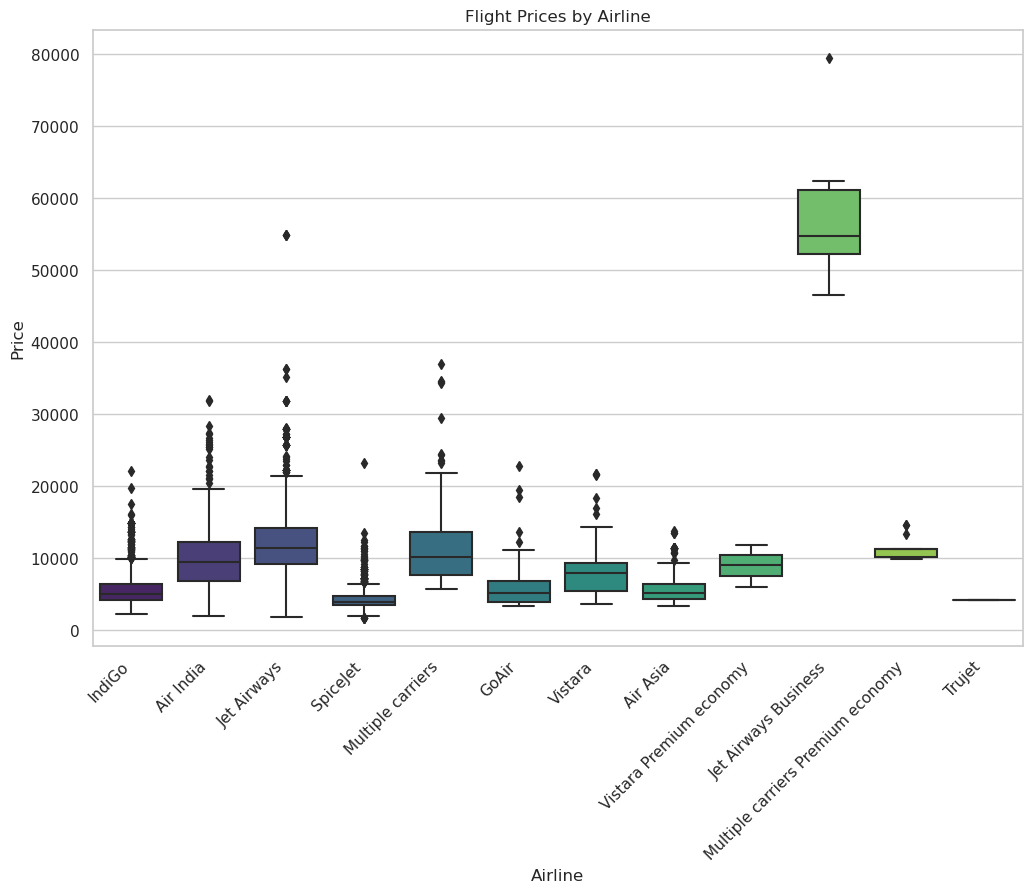

In [7]:
import seaborn as sns

# Assuming 'airline' is the column containing airline information and 'price' is the column containing flight prices
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=flight_data, palette="viridis")
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Ans - Yes , there are many outliers are present in the dataset as you can see in the boxplot.

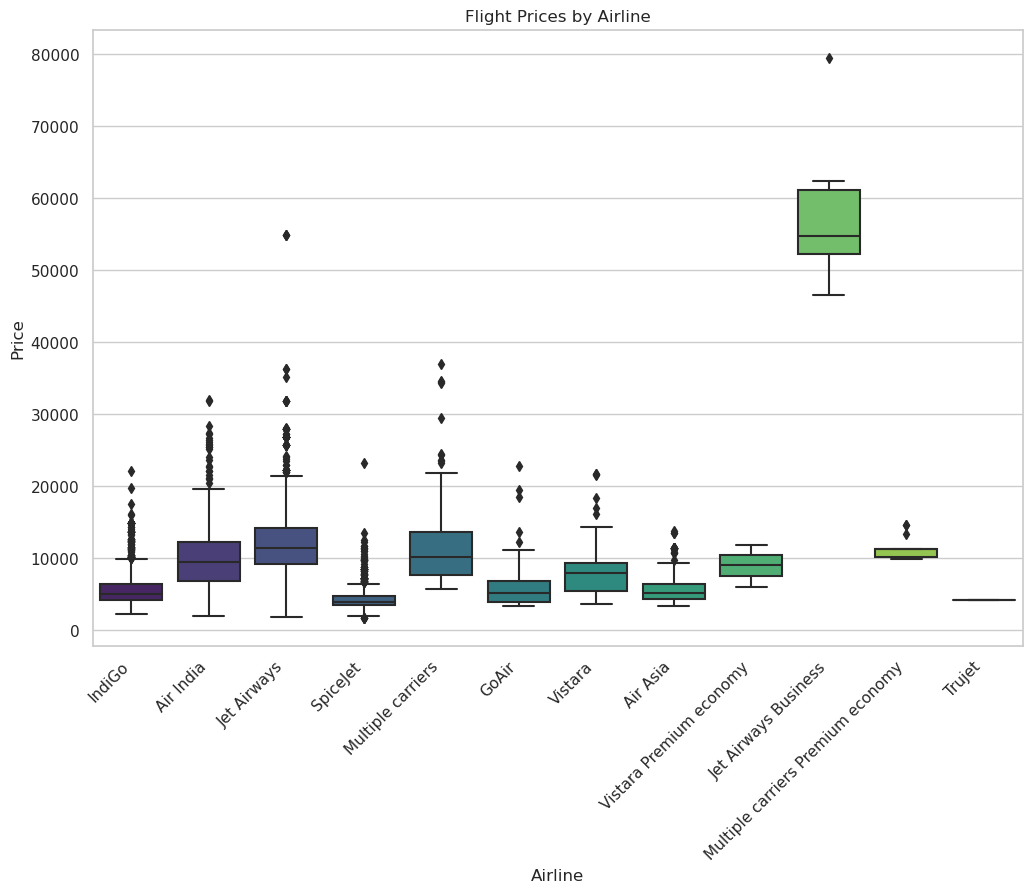

In [8]:
import seaborn as sns

# Assuming 'airline' is the column containing airline information and 'price' is the column containing flight prices
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=flight_data, palette="viridis")
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Outliers can have a significant impact on data analysis, and their presence can affect the results and interpretations of statistical analyses in various ways. Here are some ways outliers may affect your analysis:

1.Skewing Descriptive Statistics:
   *Outliers can greatly influence measures of central tendency (mean, median, mode) and measures of dispersion (standard deviation, range). The mean is particularly sensitive to extreme values.

2.Impact on Normality Assumptions:
    *Many statistical methods assume that the data follows a normal distribution. Outliers can violate this assumption, leading to inaccurate results and affecting the validity of statistical tests.

3.Influence on Correlation and Regression Analysis:
   *Outliers can distort the relationship between variables. In correlation and regression analyses, a single outlier can have a substantial impact on the estimated coefficients and the overall fit of the model.

4.Effect on Hypothesis Testing:
   *Outliers can influence the results of hypothesis tests. For example, if your data contains extreme values, it may lead to the rejection of null hypotheses when they might not be rejected if the outliers were not present.

5.Increased Type I and Type II Errors:
   *Outliers can increase the risk of both Type I errors (false positives) and Type II errors (false negatives) in statistical tests. This can lead to incorrect conclusions about the significance of relationships or differences.

6.Reduced Generalizability:
   *If outliers are not representative of the general pattern in the data, including them can lead to models that do not generalize well to new data. This is especially true in predictive modeling.

7.Misleading Interpretations:
   *Outliers may distort the interpretation of results, leading to incorrect conclusions about the nature and strength of relationships within the data.

8.Increased Variability:
   *Outliers can inflate the variability of the data, making it difficult to discern true patterns or trends.

9.Data Transformation Challenges:
   *Outliers may make it challenging to apply certain statistical techniques or models that assume a certain level of homogeneity or normality in the data.

10.Bias in Machine Learning Models:
    *In machine learning, outliers can impact the training process and lead to biased models that perform poorly on new, unseen data.

Dealing with outliers appropriately, whether through transformation, removal, or using robust statistical methods, is essential to ensure the accuracy and reliability of your analyses. It's also crucial to understand the context of the data and the domain to make informed decisions about how to handle outliers.







Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

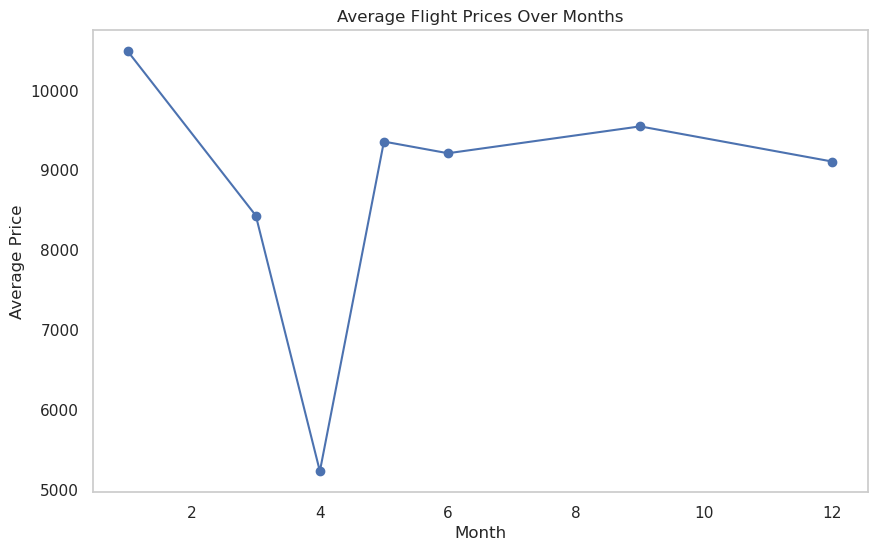

In [14]:


# Assuming your dataset has a 'Date' column
flight_data['Date'] = pd.to_datetime(flight_data['Date'])

# Extract features for analysis
flight_data['Month'] = flight_data['Date'].dt.month
flight_data['Year'] = flight_data['Date'].dt.year

# Group by month and calculate the average flight price
average_prices = flight_data.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Plot the average flight prices over months
plt.figure(figsize=(10, 6))
plt.plot(average_prices['Month'], average_prices['Price'], marker='o')
plt.title('Average Flight Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(False)
plt.show()

By analysing this graph, we can easily see that january is the peak season .

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?


Identifying trends in flight prices involves analyzing various features that can provide insights into how prices fluctuate over time. Here are some features to consider, along with suggested visualizations to present your findings:

1. Date/Time Information:

Analyze flight prices based on date/time features, such as day of the week, month, and season. Visualize trends over time using line charts or time series plots.

2. Booking Lead Time:

Examine how flight prices vary based on the booking lead time. Create scatter plots or box plots to show the relationship between lead time and prices.

3. Route Analysis:

Analyze flight prices based on specific routes. Use bar charts or grouped bar charts to compare prices for different routes.

4. Time of Day:

Explore if there are trends based on the time of day. Visualize the distribution of prices across different times using histograms or violin plots.

5. Flight Duration:

Analyze trends based on the duration of flights. Use scatter plots or box plots to show how prices correlate with flight duration.

6. Holidays and Special Events:

Consider incorporating information about holidays and special events. Create line charts or heatmaps to visualize how prices change around specific events.

7. Seasonal Patterns:

Explore if there are seasonal patterns in flight prices. Use seasonal decomposition or box plots to highlight variations in prices across different seasons.

8. Airline Comparison:

Analyze how prices vary among different airlines. Create box plots, violin plots, or bar charts to compare the distribution of prices for each airline.

9. Day-of-Week Patterns:

Investigate whether there are trends based on the day of the week. Use bar charts or line charts to illustrate how prices fluctuate throughout the week.

10. Correlation with Economic Indicators:

Explore if there are correlations between flight prices and economic indicators such as fuel prices or inflation. Use scatter plots or correlation matrices to visualize these relationships.

Once you've analyzed these features, you can present your findings to your team using a combination of visualizations. Here's a suggested approach:

1. Dashboard:

Create an interactive dashboard that allows your team to explore the data themselves and gain insights into different trends.

2. Line Charts:

Use line charts to show trends in flight prices over time, especially focusing on significant changes or patterns.

3. Scatter Plots:

Create scatter plots to visualize relationships between flight prices and booking lead time, flight duration, or other continuous variables.

4. Bar Charts:

Utilize bar charts to compare prices across different routes, airlines, or days of the week.

5. Heatmaps:

Use heatmaps to represent the impact of holidays and special events on flight prices.

6. Box Plots/Violin Plots:

Employ box plots or violin plots to show the distribution of flight prices and identify outliers or variations.

7. Narrative Report:

Summarize key trends in a narrative report, highlighting important findings and recommendations.

By using a combination of these visualizations, you can effectively communicate trends in flight prices to your team and support data-driven decision-making for pricing strategies and marketing efforts.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?


Ans - Identifying the factors that affect flight prices involves analyzing various features that contribute to pricing variability. Here are key features to consider and how you might present your findings to the management team:

1. Route Information:

Analyze flight prices based on specific routes. Explore if prices vary depending on the origin-destination pair. Present the findings using bar charts or box plots to compare average prices for different routes.

2. Time-related Features:

Investigate how flight prices change over time. Consider day of the week, month, and seasonality. Use time series plots, line charts, or heatmaps to illustrate temporal trends.

3. Booking Lead Time:

Examine the relationship between booking lead time (the duration between booking and departure) and flight prices. Utilize scatter plots or regression analysis to showcase how lead time influences prices.

4. Flight Duration:

Analyze the impact of flight duration on prices. Create scatter plots or box plots to visualize the correlation between flight duration and pricing.

5.Airline Influence:

Investigate the role of different airlines in pricing variations. Use box plots, violin plots, or bar charts to compare the distribution of prices among different airlines.

6. Cabin Class:

Analyze how flight prices differ based on cabin class (economy, business, first class). Present the findings using bar charts or box plots to highlight pricing variations across classes.

7. Seasonal Patterns:

Explore if there are seasonal patterns affecting flight prices. Use seasonal decomposition or line charts to illustrate price trends over different seasons.

8. Holidays and Events:

Consider the impact of holidays and special events on flight prices. Create visualizations, such as line charts or heatmaps, to show how prices change around specific events.

9. Economic Indicators:

Investigate the correlation between flight prices and economic indicators like fuel prices or inflation. Use scatter plots or correlation matrices to visualize these relationships.

10. Competitor Analysis:

Analyze how competitors' pricing strategies affect your own prices. Use comparative analyses, bar charts, or line charts to showcase differences in pricing among competitors.

To present your findings to the management team:

1. Executive Summary:

Start with an executive summary that provides a high-level overview of the key factors influencing flight prices.

2. Visualizations:

Use a combination of visualizations, such as bar charts, line charts, scatter plots, and heatmaps, to present trends and relationships in an easily understandable format.

3. Insights and Recommendations:

Summarize key insights derived from the analysis and provide actionable recommendations. Clearly articulate how identified factors can be leveraged for pricing optimization.

4. Interactive Dashboards (Optional):

Consider creating interactive dashboards that allow the management team to explore the data themselves and gain deeper insights.

5. Detailed Analysis Documentation:

Provide detailed documentation of your analysis methods, data preprocessing steps, and statistical techniques used. This helps ensure transparency and replicability of the analysis.

By presenting your findings in a clear and structured manner, you can assist the management team in making informed decisions regarding pricing strategies, route planning, and other aspects of the airline business.

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
# Display the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10841
Number of columns: 13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

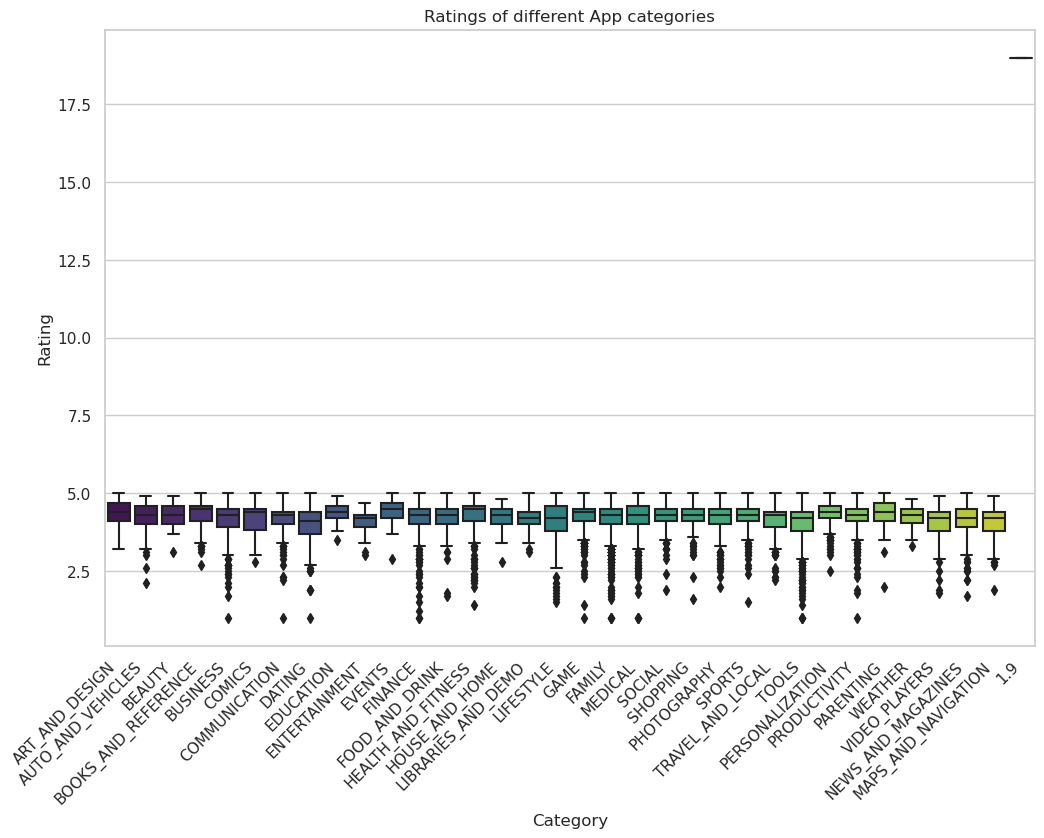

In [41]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating', data=df , palette="viridis")
plt.title('Ratings of different App categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [4]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


The impact of missing values on your analysis depends on the extent and nature of the missing data. Some potential impacts include:

1. Biased Analysis:
If the missing values are not randomly distributed, it could introduce bias into your analysis. For example, if certain demographic information is missing, your analysis may not be representative of the entire population.

2. Reduced Statistical Power:
Missing data can reduce the statistical power of your analysis, making it harder to detect significant effects or relationships.

3. Incorrect Conclusions:
If missing values are not handled properly, they can lead to incorrect conclusions. For instance, ignoring missing data without understanding the reason for its absence may result in flawed interpretations.

4. Data Imputation Challenges:
If you decide to impute missing values (replace them with estimated values), the method used for imputation can introduce its own set of assumptions and potential errors.

It's crucial to carefully examine the pattern of missing data, understand the reasons behind the missing values, and decide on an appropriate strategy for handling them based on the specific characteristics of your dataset and the goals of your analysis.







Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [5]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


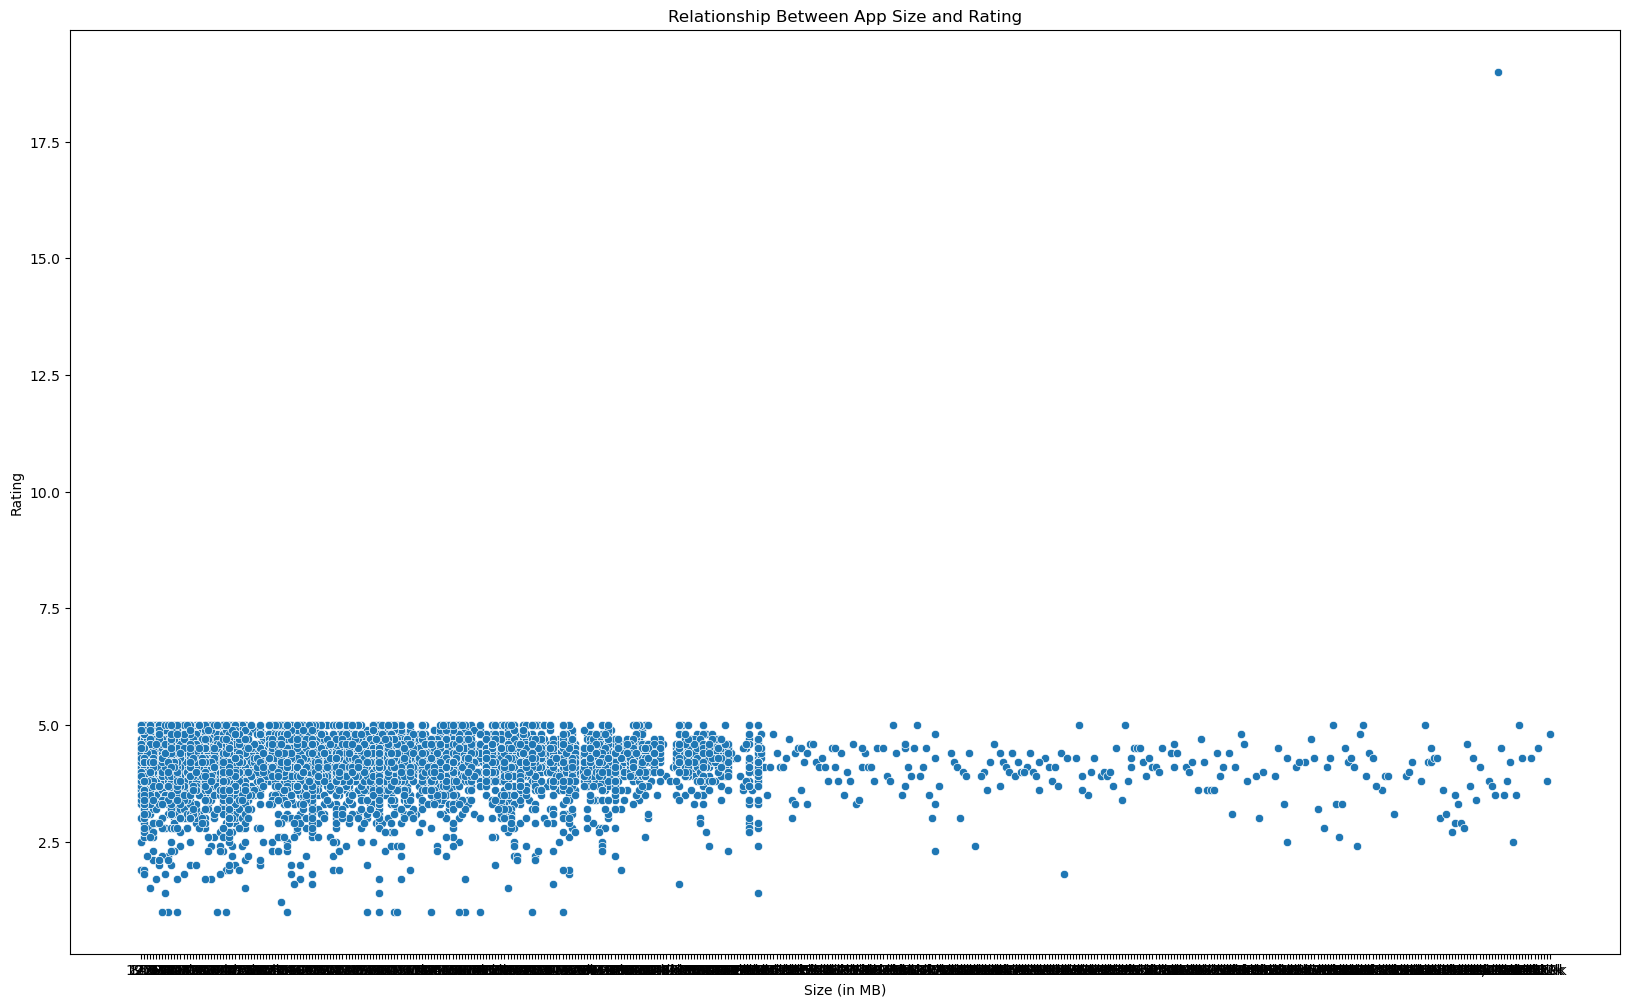

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Size' and 'Rating' columns
# Scatter plot
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=1)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.show()


Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Type' and 'Price' columns
# Bar chart for average prices by app type
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Price', data=df, ci=None)  # ci=None to hide error bars
plt.title('Average Prices by App Type')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [4]:
import pandas as pd

# Creating a frequency table
frequency_table = df.groupby('App')['Installs'].sum().reset_index()

# Sorting the table by installs in descending order
frequency_table = frequency_table.sort_values(by='Installs', ascending=False)

# Displaying the top 10 apps
top_10_apps = frequency_table.head(10)
print(top_10_apps)


                                              App  \
5806      Life Made WI-Fi Touchscreen Photo Frame   
2364                             Candy Crush Saga   
8304                                 Temple Run 2   
8816                              Viber Messenger   
7890                                     Snapchat   
9508                imo free video calls and chat   
7116                                          Pou   
8673  UC Browser - Fast Download Private & Secure   
5672                  LINE: Free Calls & Messages   
5978                                    MX Player   

                                               Installs  
5806                                               Free  
2364  500,000,000+500,000,000+500,000,000+500,000,00...  
8304  500,000,000+500,000,000+500,000,000+500,000,00...  
8816  500,000,000+500,000,000+500,000,000+500,000,00...  
7890   500,000,000+500,000,000+500,000,000+500,000,000+  
9508   500,000,000+500,000,000+500,000,000+500,000,000+  
7116   500

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

<AxesSubplot: ylabel='Category'>

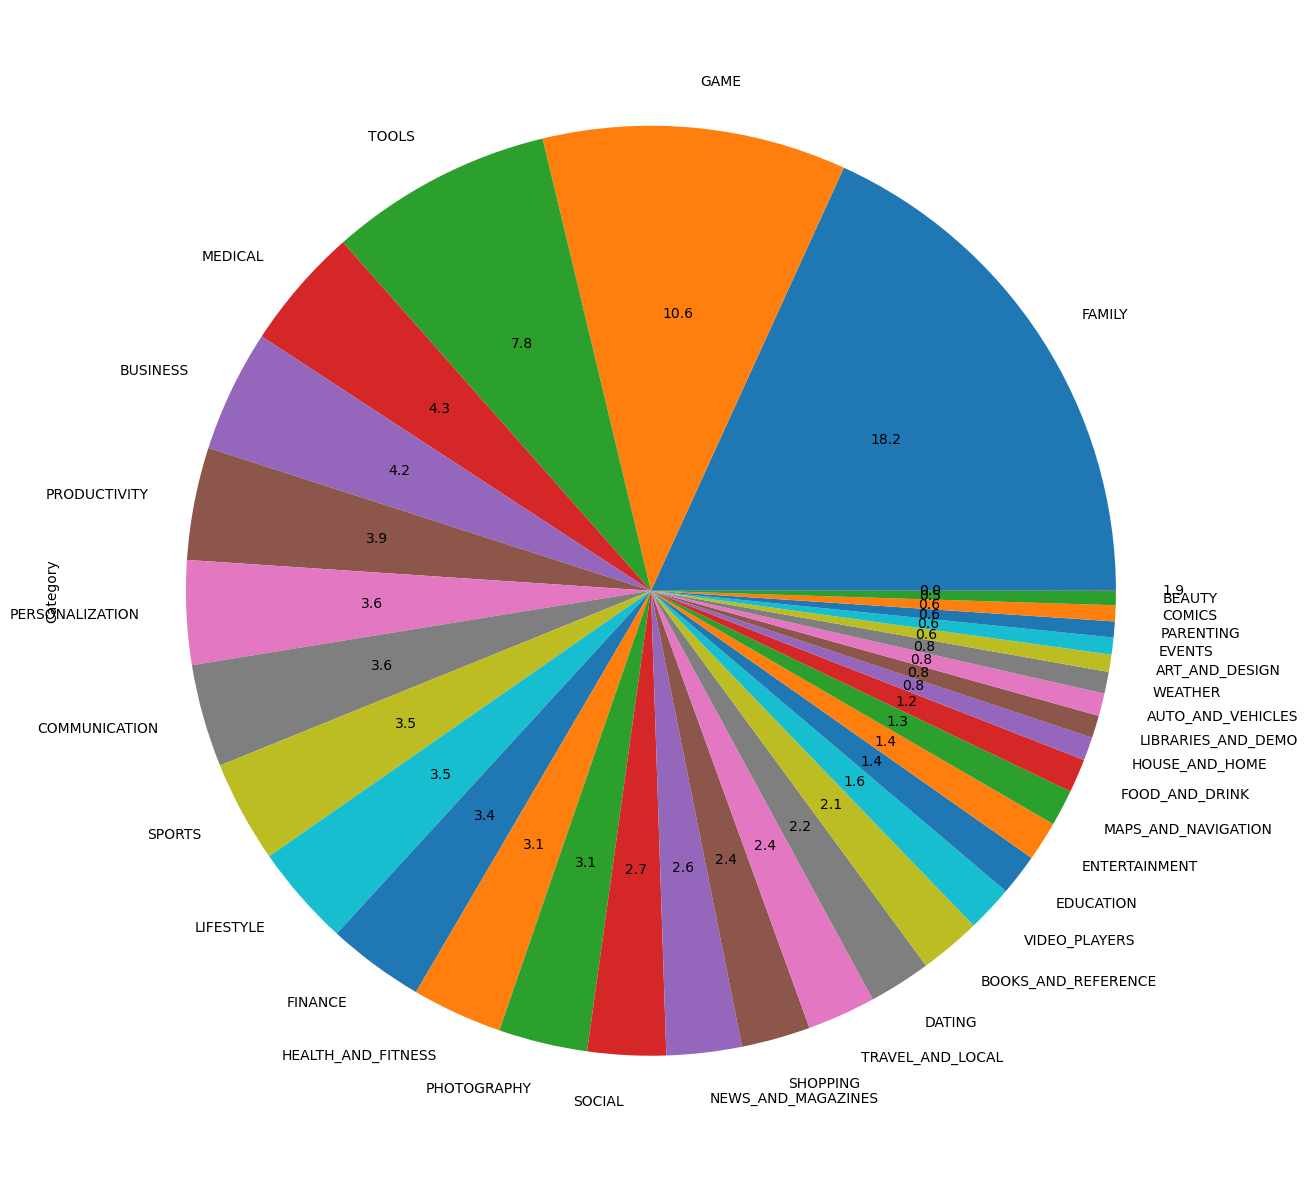

In [5]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

These are the most popular app categories on play store. I will recommend to choose top most popular app category.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

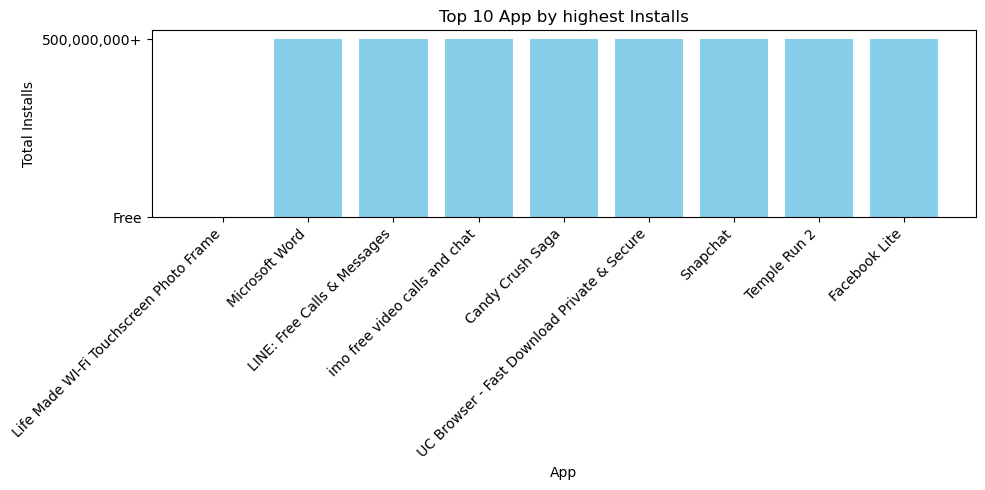

In [15]:
df = df.sort_values(by='Installs', ascending=False)

# Select the top 10 developers
top_10_installs = df.head(10)

# Create a bar graph for the top 10 developers
plt.figure(figsize=(10, 5))
plt.bar(top_10_installs['App'], top_10_installs['Installs'], color='skyblue')
plt.xlabel('App')
plt.ylabel('Total Installs')
plt.title('Top 10 App by highest Installs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

i wil recommend for develop  calling app or gaming app

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [19]:



# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month_Year'] = df['Date'].dt.to_period('M')

# Group by month and sum the installs
monthly_installs = df.groupby('Month_Year')['Installs'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_installs['Month_Year'], monthly_installs['Installs'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Installs')
plt.title('Monthly Installs Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'Date'